In [1]:
%matplotlib inline
#%matplotlib widget

In [2]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
import scipy as sc
import matplotlib.colors as colors
import os
from ipywidgets import HBox, Textarea, interact

In [69]:
def read_time(time_value):
    fps=25
    sign_index=time_value.index(':')
    minutes=int(time_value[0:sign_index])
    sec=int(time_value[sign_index+1:len(time_value)])
    frames=(minutes*60+sec)*25
    return frames
#def expShift(t,A,tau,k):
#    return A*np.exp(-t/tau)+k
def expShift(t,A,tau,k):
    return A*np.exp(-(t**2)/((tau**2)))+k
#def CovToCorr(cov_data):
#    shape=cov_data.shape
#    result=[]
#    for i in range(0,shape):
def powerlaw(x,A,n):
    return A*x**n
def linear_fit_log(x,n,A):
    return n*x+A
    

In [4]:
expSumFileNamePassive='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\expSumPack_botnum_28cm.csv'
expSumPassive=pd.read_csv(expSumFileNamePassive,index_col=0)
passive_path='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged'
all_data=pd.DataFrame()
for index,row in expSumPassive.iterrows():
    #bot experiment loop
    FileName=row.linkingFileNamePack
    bot_num_current=row.bots
    starting_frame=read_time(row.start_min)
    data=pd.read_csv(passive_path+'\\'+FileName,index_col=0)
    relevant_data=data.iloc[starting_frame:len(data)].reset_index()
    relevant_data['Filename']=[FileName]*len(relevant_data)
    relevant_data['BotNum']=[row.bots]*len(relevant_data)
    relevant_data['BotType']=[row.bottype]*len(relevant_data)
    all_data=pd.concat([all_data,relevant_data],axis=0)
all_data.to_csv(passive_path+'\\all_linking_passive_data_28cm.csv')

In [7]:
print(relevant_data)

       frame  frame.1      x      y      r  particle  \
0        851      851  658.5  557.5  103.2         0   
1        852      852  657.5  560.5  105.4         0   
2        853      853  659.5  557.5  104.3         0   
3        854      854  658.5  557.5  103.2         0   
4        855      855  658.5  557.5  103.2         0   
...      ...      ...    ...    ...    ...       ...   
29421  30272    30272  345.5  872.5  104.3         0   
29422  30273    30273  344.5  871.5  103.2         0   
29423  30274    30274  345.5  872.5  104.3         0   
29424  30275    30275  345.5  869.5  104.3         0   
29425  30276    30276  344.5  870.5  103.2         0   

                                   Filename  BotNum  BotType  
0      aligner_N021_D028_C0498.MP4_link.csv      21  aligner  
1      aligner_N021_D028_C0498.MP4_link.csv      21  aligner  
2      aligner_N021_D028_C0498.MP4_link.csv      21  aligner  
3      aligner_N021_D028_C0498.MP4_link.csv      21  aligner  
4      align

3
3269
Float64Index([  1.0,  1.04,  1.08,  1.12,  1.16,   1.2,  1.24,  1.28,  1.32,
               1.36,
              ...
              99.64, 99.68, 99.72, 99.76,  99.8, 99.84, 99.88, 99.92, 99.96,
              100.0],
             dtype='float64', name='lag time [s]', length=2476)
[ 1.64515658 -3.40018376]
[0.00150181 0.00564271]


Text(0, 0.5, 'MSD $\\left[\\rm{cm}^2\\right]$')

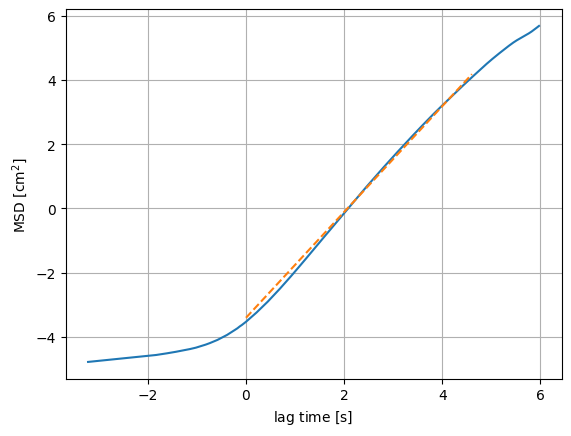

In [77]:
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]
fps =25
mpp = arenaSizeCm/arenaSizePixels/2 #[cm/pixel]
data=pd.read_csv(passive_path+'\\'+FileName,index_col=0)
relevant_data_try = tp.filter_stubs(relevant_data,threshold=100)
max_lagtime=int(len(relevant_data)/3)
imsd_try = tp.imsd(relevant_data_try,fps=fps,mpp=mpp,max_lagtime=max_lagtime)
lag_time_thresh=int(len(imsd_try)/3000)
max_lagtime_thresh=int(len(imsd_try)/3)
print(lag_time_thresh)
print(max_lagtime_thresh)
relevant_imsd=imsd_try.loc[1:100]
print(relevant_imsd.index)
fig,ax = plt.subplots()
ax.plot(np.log(imsd_try.index),np.log(imsd_try),label='msd')
p0=np.array([2,0.5])
popt,pcov = sc.optimize.curve_fit(linear_fit_log,np.log(relevant_imsd.index),np.log(relevant_imsd.iloc[:,0]),p0=p0)
perr = np.sqrt(np.diag(pcov))
corr=np.corrcoef(pcov,rowvar=True)
print(popt)
print(perr)
fit_x=np.log(relevant_imsd.index)
fit_y=fit_x*popt[0]+popt[1]
ax.plot(fit_x,fit_y,'--')
#ax.plot(df.frame,df.x)
#ax.plot(df.frame,df.y)
x = np.linspace(1,10,10)
y = 0.02E0*x**1.75
#ax.loglog(x,y,'--',label='1.75')
#ax.axis([0.01,2000,0.01,1E4])
ax.grid()

ax.set_xlabel(r'lag time $\left[\rm{s}\right]$')
ax.set_ylabel(r'MSD $\left[\rm{cm}^2\right]$')

In [ ]:
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]
fps =25
mpp = arenaSizeCm/arenaSizePixels/2 #[cm/pixel]
for index,row in expSumPassive.iterrows():
    FileName=row.linkingFileNamePack
    current_data=all_data[(all_data['FileName']==FileName)]
    
    imsd = tp.imsd(t,fps=fps,mpp=mpp,max_lagtime=len(current_data)/3)